In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
from cycler import cycler
import numpy as np

# need to sort out this color business, the default is hopeless
colormap = matplotlib.cm.get_cmap('Accent')
plt.rcParams['axes.prop_cycle'] = cycler('color', [colormap(k) for k in np.linspace(0, 1, 10)])

In [49]:
import glob

highlr_id_files = glob.glob('../weightnorm_tests/*/identity/1/train_valid_loss.csv')
lowlr_id_files = glob.glob('../weightnorm_tests/*/identity/01/train_valid_loss.csv')
highlr_norm_files = glob.glob('../weightnorm_tests/*/normal/1/train_valid_loss.csv')
lowlr_norm_files = glob.glob('../weightnorm_tests/*/normal/01/train_valid_loss.csv')

def load_result(filename):
    with open(filename) as f:
        return np.array([[float(s) for s in line.split(',')] for line in f])

highlr_id = {filename: load_result(filename) for filename in highlr_id_files}
lowlr_id = {filename: load_result(filename) for filename in lowlr_id_files}
highlr_norm = {filename: load_result(filename) for filename in highlr_norm_files}
lowlr_norm = {filename: load_result(filename) for filename in lowlr_norm_files}

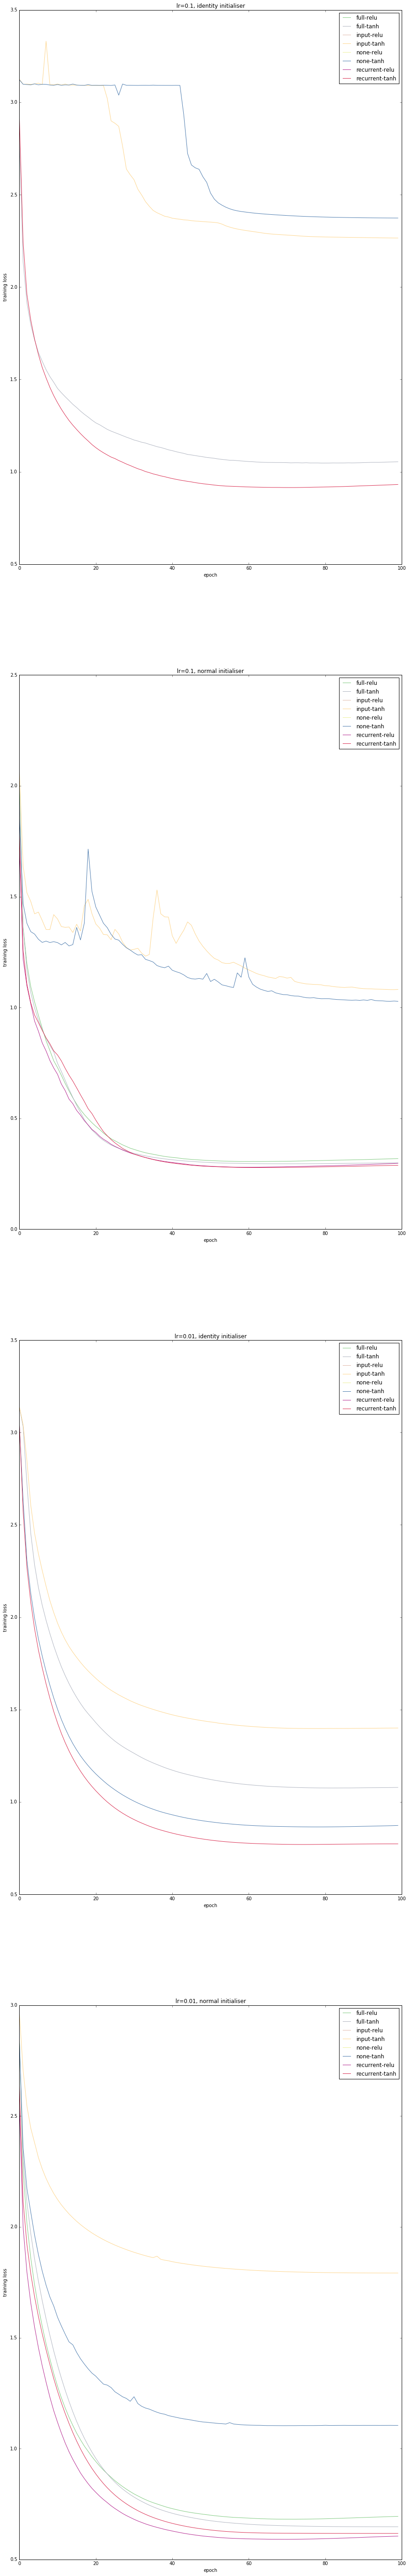

In [51]:
def plot_result(data_dict):
    lines = []
    for name in sorted(data_dict): # do same order every time
        if data_dict[name][0,1] != np.nan:
            nice_name = name.split('/')[2]
            lines.append(plt.plot(data_dict[name][...,1], label=nice_name)[0])
    plt.ylabel('training loss')
    plt.xlabel('epoch')
    plt.legend()
    return lines

fig = plt.figure(figsize=(15,100))
nice_names = [name.split('/')[2] for name in sorted(highlr_id)]
plt.subplot(4,1,1)
plot_result(highlr_id)
plt.title('lr=0.1, identity initialiser')

plt.subplot(4,1,2)
handles=plot_result(highlr_norm)
plt.title('lr=0.1, normal initialiser')

plt.subplot(4,1,3)
plot_result(lowlr_id)
plt.title('lr=0.01, identity initialiser')

plt.subplot(4,1,4)
plot_result(lowlr_norm)
plt.title('lr=0.01, normal initialiser')

#plt.figlegend(handles, nice_names, 'upper right')